# Topic Modelling - LDA

In [1]:
import pandas as pd 
import numpy as np
import nltk
import string
from gensim import corpora, models, similarities
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hollychan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
#Quarantine dataset
Quan = pd.read_csv('../output/data_Quarantine_labelled.csv')

Quan["customer review text all"] = Quan["customer review text all"].astype(str)
Quan["hotel reply text"] = Quan["hotel reply text"].astype(str)

#Non-Quarantine dataset
NonQuan = pd.read_csv('../output/data_NonQuarantine_labelled.csv')

NonQuan["customer review text all"] = NonQuan["customer review text all"].astype(str)
NonQuan["hotel reply text"] = NonQuan["hotel reply text"].astype(str)

In [5]:
#text preprocessing (cleaning, tokenizing and stemming)
def tokenize(text):
    # Remove punctuation
    tokenizer = nltk.RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text)
    
    # Remove Stop Words (all lowercase in corpora)
    stop_words = set(nltk.corpus.stopwords.words('english')) 
    filteredTokens = [w for w in tokens if not w.lower() in stop_words]
    
    # Create stemmed tokens using the Porter stemmer
    # Also convert to lowercase
    stemmer = nltk.PorterStemmer()
    stems = []
    
    # Remove those words don't give us insight, remove them for our analysis
    custom_remove_words = ['would','also','21','14','day','one','nan','quarantin','hotel','room','hong','kong','stay']
    
    for item in filteredTokens:
        stemword = stemmer.stem(item)
        if stemword not in custom_remove_words:
            stems.append(stemword)
    return stems

## Topic Modelling - LDA - Quarantine - customer reviews

In [6]:
tokenDesc = []
for index, text in Quan.iterrows():
    tokenDesc.append(tokenize(text["customer review text all"]))

#generate a dictionary from token list
dictionary = corpora.Dictionary(tokenDesc)

#generate a corpus containing a Bag of Words for each description
corpus = [dictionary.doc2bow(text) for text in tokenDesc]

#Generate an LDA model
n_topics = 10

lda_model = models.ldamodel.LdaModel(corpus=corpus,
                                     id2word=dictionary,
                                     num_topics=n_topics)

lda_model.show_topics()

adding document #0 to Dictionary(0 unique tokens: [])
built Dictionary(7059 unique tokens: ['alright', 'avail', 'better', 'easier', 'experi']...) from 1658 documents (total 119208 corpus positions)
Dictionary lifecycle event {'msg': "built Dictionary(7059 unique tokens: ['alright', 'avail', 'better', 'easier', 'experi']...) from 1658 documents (total 119208 corpus positions)", 'datetime': '2022-04-21T00:03:23.740378', 'gensim': '4.1.2', 'python': '3.8.8 (default, Apr 13 2021, 12:59:45) \n[Clang 10.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'created'}
using symmetric alpha at 0.1
using symmetric eta at 0.1
using serial LDA version on this node
running online (single-pass) LDA training, 10 topics, 1 passes over the supplied corpus of 1658 documents, updating model once every 1658 documents, evaluating perplexity every 1658 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of pa

[(0,
  '0.011*"time" + 0.010*"staff" + 0.010*"food" + 0.009*"servic" + 0.009*"thank" + 0.008*"view" + 0.007*"like" + 0.007*"good" + 0.007*"dorsett" + 0.006*"need"'),
 (1,
  '0.014*"food" + 0.013*"staff" + 0.012*"servic" + 0.010*"help" + 0.007*"nice" + 0.006*"clean" + 0.006*"thank" + 0.005*"recommend" + 0.005*"time" + 0.005*"book"'),
 (2,
  '0.011*"food" + 0.007*"good" + 0.007*"meal" + 0.007*"servic" + 0.006*"staff" + 0.006*"clean" + 0.006*"need" + 0.006*"great" + 0.006*"experi" + 0.005*"provid"'),
 (3,
  '0.012*"food" + 0.011*"staff" + 0.007*"meal" + 0.007*"thank" + 0.007*"well" + 0.007*"help" + 0.006*"clean" + 0.006*"good" + 0.006*"team" + 0.006*"comfort"'),
 (4,
  '0.021*"food" + 0.021*"good" + 0.018*"staff" + 0.014*"servic" + 0.009*"time" + 0.008*"meal" + 0.008*"great" + 0.007*"nice" + 0.007*"need" + 0.007*"clean"'),
 (5,
  '0.011*"staff" + 0.010*"servic" + 0.010*"need" + 0.009*"food" + 0.009*"help" + 0.007*"even" + 0.006*"check" + 0.006*"time" + 0.006*"good" + 0.006*"week"'),
 (6,


using symmetric alpha at 1.0
using symmetric eta at 1.0
using serial LDA version on this node
running online (single-pass) LDA training, 1 topics, 1 passes over the supplied corpus of 1658 documents, updating model once every 1658 documents, evaluating perplexity every 1658 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
-9.140 per-word bound, 564.0 perplexity estimate based on a held-out corpus of 1658 documents with 119208 words
PROGRESS: pass 0, at document #1658/1658
topic #0 (1.000): 0.013*"food" + 0.012*"staff" + 0.010*"servic" + 0.009*"good" + 0.008*"time" + 0.007*"help" + 0.006*"clean" + 0.006*"need" + 0.006*"meal" + 0.005*"great"
topic diff=1.579073, rho=1.000000
LdaModel lifecycle event {'msg': 'trained LdaModel(num_terms=7059, num_topics=1, decay=0.5, chunksize=2000) in 0.42s', 'datetime': '2022-04-21T00:10:03.763232', 'gensim': '4.1.2', 

too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
-9.729 per-word bound, 848.6 perplexity estimate based on a held-out corpus of 1658 documents with 119208 words
PROGRESS: pass 0, at document #1658/1658
topic #0 (0.167): 0.011*"staff" + 0.009*"good" + 0.008*"servic" + 0.008*"time" + 0.008*"meal" + 0.008*"food" + 0.007*"provid" + 0.006*"book" + 0.005*"realli" + 0.005*"check"
topic #3 (0.167): 0.013*"food" + 0.012*"good" + 0.012*"servic" + 0.009*"staff" + 0.008*"clean" + 0.007*"help" + 0.006*"meal" + 0.006*"great" + 0.006*"need" + 0.006*"provid"
topic #4 (0.167): 0.012*"food" + 0.009*"time" + 0.009*"servic" + 0.008*"staff" + 0.007*"make" + 0.007*"help" + 0.007*"check" + 0.006*"need" + 0.006*"provid" + 0.005*"comfort"
topic #2 (0.167): 0.018*"staff" + 0.010*"good" + 0.010*"food" + 0.009*"servic" + 0.007*"thank" + 0.007*"time" + 0.006*"help" + 0.006*"need" + 0.005*"meal" + 0.005*"made"
topic #1 (0.167): 0.017*"food" + 0

topic #7 (0.100): 0.013*"food" + 0.011*"staff" + 0.009*"good" + 0.008*"servic" + 0.007*"time" + 0.006*"recommend" + 0.006*"deliveri" + 0.006*"great" + 0.006*"clean" + 0.006*"help"
topic #9 (0.100): 0.011*"staff" + 0.010*"time" + 0.006*"help" + 0.006*"servic" + 0.006*"well" + 0.006*"food" + 0.006*"provid" + 0.006*"week" + 0.005*"check" + 0.005*"clean"
topic #1 (0.100): 0.010*"staff" + 0.009*"help" + 0.009*"good" + 0.008*"servic" + 0.008*"need" + 0.008*"food" + 0.007*"meal" + 0.006*"book" + 0.006*"2" + 0.006*"time"
topic #6 (0.100): 0.016*"food" + 0.014*"staff" + 0.009*"time" + 0.008*"need" + 0.008*"servic" + 0.007*"help" + 0.007*"clean" + 0.007*"provid" + 0.006*"thank" + 0.006*"meal"
topic diff=4.665968, rho=1.000000
LdaModel lifecycle event {'msg': 'trained LdaModel(num_terms=7059, num_topics=10, decay=0.5, chunksize=2000) in 1.56s', 'datetime': '2022-04-21T00:10:29.375145', 'gensim': '4.1.2', 'python': '3.8.8 (default, Apr 13 2021, 12:59:45) \n[Clang 10.0.0 ]', 'platform': 'macOS-10.1

topic #3 (0.071): 0.018*"good" + 0.018*"servic" + 0.017*"food" + 0.009*"staff" + 0.008*"time" + 0.007*"provid" + 0.006*"help" + 0.006*"realli" + 0.006*"need" + 0.005*"us"
topic #1 (0.071): 0.009*"food" + 0.009*"good" + 0.009*"meal" + 0.008*"servic" + 0.008*"staff" + 0.006*"time" + 0.006*"clean" + 0.005*"thank" + 0.005*"help" + 0.005*"great"
topic diff=6.782481, rho=1.000000
LdaModel lifecycle event {'msg': 'trained LdaModel(num_terms=7059, num_topics=14, decay=0.5, chunksize=2000) in 1.61s', 'datetime': '2022-04-21T00:10:40.759078', 'gensim': '4.1.2', 'python': '3.8.8 (default, Apr 13 2021, 12:59:45) \n[Clang 10.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'created'}
-53.897 per-word bound, 16778307052500258.0 perplexity estimate based on a held-out corpus of 1658 documents with 1621 words
using symmetric alpha at 0.06666666666666667
using symmetric eta at 0.06666666666666667
using serial LDA version on this node
running online (single-pass) LDA training, 15 topics, 1 

topic diff=9.056405, rho=1.000000
LdaModel lifecycle event {'msg': 'trained LdaModel(num_terms=7059, num_topics=18, decay=0.5, chunksize=2000) in 1.60s', 'datetime': '2022-04-21T00:10:52.159847', 'gensim': '4.1.2', 'python': '3.8.8 (default, Apr 13 2021, 12:59:45) \n[Clang 10.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'created'}
-66.320 per-word bound, 92116630615281696768.0 perplexity estimate based on a held-out corpus of 1658 documents with 1620 words
using symmetric alpha at 0.05263157894736842
using symmetric eta at 0.05263157894736842
using serial LDA version on this node
running online (single-pass) LDA training, 19 topics, 1 passes over the supplied corpus of 1658 documents, updating model once every 1658 documents, evaluating perplexity every 1658 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
-11.384 per-word bound, 267

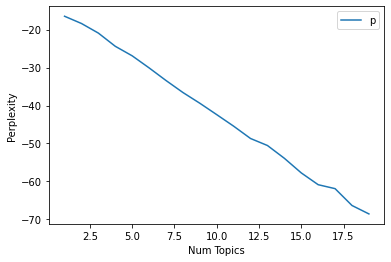

In [8]:
# Test the CoherenceModel and Perplexity
# The smaller the value of Perplexity, the greater the difference between each topic.
# The higher the value of Coherence, the better the consistency of the topic.

from gensim.models import CoherenceModel

# Compute Perplexity: a measure of how good the model is. lower the better.
perplexity = [] 

# Test various number of topics (1-20)
for n_topics in range(1,20,1):
    # Create the LDA model
    lda_model = models.ldamodel.LdaModel(corpus=corpus,
                                 id2word=dictionary,
                                 num_topics=n_topics)
    # Prepare the corpus and compute the perplexity score
    corpus_per = lda_model[corpus]
    perplexitymodel = lda_model.log_perplexity(corpus_per)
    perplexity.append(perplexitymodel)
    
# line chart of perplexity
import matplotlib.pyplot as plt
%matplotlib inline

limit=20; start=1; step=1;
x = range(start, limit, step)
plt.plot(x, perplexity)
plt.xlabel("Num Topics")
plt.ylabel("Perplexity")
plt.legend(("perplexity_values"), loc='best')
plt.show()

In [9]:
# Print the perplexity scores
for m, cv in zip(x, perplexity):
    print("Num Topics =", m, " preplexity score:", round(cv, 4))

Num Topics = 1  preplexity score: -16.5078
Num Topics = 2  preplexity score: -18.414
Num Topics = 3  preplexity score: -20.9406
Num Topics = 4  preplexity score: -24.4152
Num Topics = 5  preplexity score: -26.9243
Num Topics = 6  preplexity score: -30.0987
Num Topics = 7  preplexity score: -33.4203
Num Topics = 8  preplexity score: -36.578
Num Topics = 9  preplexity score: -39.4065
Num Topics = 10  preplexity score: -42.4048
Num Topics = 11  preplexity score: -45.441
Num Topics = 12  preplexity score: -48.6872
Num Topics = 13  preplexity score: -50.5294
Num Topics = 14  preplexity score: -53.8974
Num Topics = 15  preplexity score: -57.742
Num Topics = 16  preplexity score: -60.8456
Num Topics = 17  preplexity score: -61.8858
Num Topics = 18  preplexity score: -66.3201
Num Topics = 19  preplexity score: -68.5349


using symmetric alpha at 0.01
using symmetric eta at 0.01
using serial LDA version on this node
running online (single-pass) LDA training, 100 topics, 1 passes over the supplied corpus of 1658 documents, updating model once every 1658 documents, evaluating perplexity every 1658 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
-27.951 per-word bound, 259382753.3 perplexity estimate based on a held-out corpus of 1658 documents with 119208 words
PROGRESS: pass 0, at document #1658/1658
topic #69 (0.010): 0.018*"staff" + 0.016*"food" + 0.012*"servic" + 0.010*"help" + 0.007*"deliveri" + 0.006*"recommend" + 0.006*"clean" + 0.006*"friendli" + 0.006*"nice" + 0.006*"meal"
topic #50 (0.010): 0.010*"servic" + 0.009*"staff" + 0.009*"food" + 0.009*"wifi" + 0.008*"need" + 0.008*"water" + 0.008*"guest" + 0.008*"even" + 0.007*"time" + 0.007*"connect"
topic #6 (0.010

using ParallelWordOccurrenceAccumulator(processes=7, batch_size=64) to estimate probabilities from sliding windows
5 batches submitted to accumulate stats from 320 documents (-6543 virtual)
7 accumulators retrieved from output queue
accumulated word occurrence stats for 26056 virtual documents
using symmetric alpha at 0.01
using symmetric eta at 0.01
using serial LDA version on this node
running online (single-pass) LDA training, 100 topics, 1 passes over the supplied corpus of 1658 documents, updating model once every 1658 documents, evaluating perplexity every 1658 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
-27.952 per-word bound, 259678091.5 perplexity estimate based on a held-out corpus of 1658 documents with 119208 words
PROGRESS: pass 0, at document #1658/1658
topic #50 (0.010): 0.014*"need" + 0.012*"clean" + 0.010*"food" + 0.010*"staff" 

topic diff=71.874161, rho=1.000000
LdaModel lifecycle event {'msg': 'trained LdaModel(num_terms=7059, num_topics=100, decay=0.5, chunksize=2000) in 2.37s', 'datetime': '2022-04-21T00:14:44.141224', 'gensim': '4.1.2', 'python': '3.8.8 (default, Apr 13 2021, 12:59:45) \n[Clang 10.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'created'}
using ParallelWordOccurrenceAccumulator(processes=7, batch_size=64) to estimate probabilities from sliding windows
5 batches submitted to accumulate stats from 320 documents (-6543 virtual)
7 accumulators retrieved from output queue
accumulated word occurrence stats for 26056 virtual documents
using symmetric alpha at 0.01
using symmetric eta at 0.01
using serial LDA version on this node
running online (single-pass) LDA training, 100 topics, 1 passes over the supplied corpus of 1658 documents, updating model once every 1658 documents, evaluating perplexity every 1658 documents, iterating 50x with a convergence threshold of 0.001000
too few 

topic #0 (0.010): 0.016*"staff" + 0.013*"good" + 0.013*"us" + 0.011*"view" + 0.009*"much" + 0.009*"time" + 0.009*"thank" + 0.009*"even" + 0.007*"great" + 0.007*"get"
topic #20 (0.010): 0.017*"staff" + 0.016*"food" + 0.011*"help" + 0.009*"servic" + 0.009*"clean" + 0.008*"us" + 0.006*"guest" + 0.006*"call" + 0.006*"good" + 0.005*"window"
topic diff=71.945435, rho=1.000000
LdaModel lifecycle event {'msg': 'trained LdaModel(num_terms=7059, num_topics=100, decay=0.5, chunksize=2000) in 2.36s', 'datetime': '2022-04-21T00:15:14.807288', 'gensim': '4.1.2', 'python': '3.8.8 (default, Apr 13 2021, 12:59:45) \n[Clang 10.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'created'}
using ParallelWordOccurrenceAccumulator(processes=7, batch_size=64) to estimate probabilities from sliding windows
5 batches submitted to accumulate stats from 320 documents (-6543 virtual)
7 accumulators retrieved from output queue
accumulated word occurrence stats for 26056 virtual documents
using symmetric

topic #11 (0.010): 0.018*"food" + 0.016*"staff" + 0.010*"clean" + 0.010*"time" + 0.009*"check" + 0.008*"servic" + 0.008*"meal" + 0.007*"help" + 0.007*"comfort" + 0.007*"could"
topic #29 (0.010): 0.023*"staff" + 0.018*"food" + 0.016*"servic" + 0.010*"good" + 0.010*"help" + 0.010*"thank" + 0.009*"clean" + 0.008*"dorsett" + 0.008*"friendli" + 0.008*"recommend"
topic #33 (0.010): 0.017*"food" + 0.012*"staff" + 0.008*"meal" + 0.008*"provid" + 0.007*"enough" + 0.006*"need" + 0.006*"great" + 0.006*"work" + 0.005*"servic" + 0.005*"book"
topic #2 (0.010): 0.022*"help" + 0.014*"staff" + 0.009*"nice" + 0.008*"food" + 0.007*"check" + 0.007*"enough" + 0.006*"clean" + 0.006*"recommend" + 0.006*"request" + 0.006*"even"
topic diff=71.973984, rho=1.000000
LdaModel lifecycle event {'msg': 'trained LdaModel(num_terms=7059, num_topics=100, decay=0.5, chunksize=2000) in 2.56s', 'datetime': '2022-04-21T00:15:49.239257', 'gensim': '4.1.2', 'python': '3.8.8 (default, Apr 13 2021, 12:59:45) \n[Clang 10.0.0 ]',

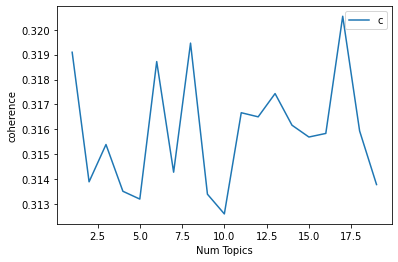

In [10]:
# Code Ref: AIDM7380 L8 - Exercise 10-11-12 - Solution
# build many LDA models with different values of the number of topics (k) and pick the one that gives the highest coherence value. 
# Choosing a ‘k’ that marks the end of a rapid growth of topic coherence usually offers meaningful and interpretable topics.

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        
    return model_list, coherence_values

model_list, coherence_values= compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=tokenDesc, start=1, limit=20, step=1)

# line chart of coherence
limit=20; start=1; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("coherence")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [11]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 1  has Coherence Value of 0.3191
Num Topics = 2  has Coherence Value of 0.3139
Num Topics = 3  has Coherence Value of 0.3154
Num Topics = 4  has Coherence Value of 0.3135
Num Topics = 5  has Coherence Value of 0.3132
Num Topics = 6  has Coherence Value of 0.3187
Num Topics = 7  has Coherence Value of 0.3143
Num Topics = 8  has Coherence Value of 0.3195
Num Topics = 9  has Coherence Value of 0.3134
Num Topics = 10  has Coherence Value of 0.3126
Num Topics = 11  has Coherence Value of 0.3167
Num Topics = 12  has Coherence Value of 0.3165
Num Topics = 13  has Coherence Value of 0.3174
Num Topics = 14  has Coherence Value of 0.3162
Num Topics = 15  has Coherence Value of 0.3157
Num Topics = 16  has Coherence Value of 0.3158
Num Topics = 17  has Coherence Value of 0.3205
Num Topics = 18  has Coherence Value of 0.3159
Num Topics = 19  has Coherence Value of 0.3138


choose n_topics = 7

In [12]:
n_topics_coh = 7

lda_model_coh = models.ldamodel.LdaModel(corpus=corpus,
                                     id2word=dictionary,
                                     num_topics=n_topics_coh)

using symmetric alpha at 0.14285714285714285
using symmetric eta at 0.14285714285714285
using serial LDA version on this node
running online (single-pass) LDA training, 7 topics, 1 passes over the supplied corpus of 1658 documents, updating model once every 1658 documents, evaluating perplexity every 1658 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
-9.836 per-word bound, 913.9 perplexity estimate based on a held-out corpus of 1658 documents with 119208 words
PROGRESS: pass 0, at document #1658/1658
topic #6 (0.143): 0.008*"staff" + 0.008*"food" + 0.008*"servic" + 0.007*"clean" + 0.006*"time" + 0.006*"book" + 0.006*"like" + 0.005*"great" + 0.005*"good" + 0.005*"meal"
topic #5 (0.143): 0.015*"staff" + 0.011*"good" + 0.011*"servic" + 0.010*"food" + 0.007*"time" + 0.006*"made" + 0.006*"help" + 0.006*"even" + 0.006*"clean" + 0.005*"provid"
topic #4 (

In [13]:
lda_model_coh.show_topics()

[(0,
  '0.012*"servic" + 0.012*"food" + 0.010*"need" + 0.009*"view" + 0.009*"good" + 0.008*"time" + 0.008*"staff" + 0.007*"clean" + 0.006*"help" + 0.006*"recommend"'),
 (1,
  '0.012*"meal" + 0.010*"food" + 0.009*"good" + 0.008*"staff" + 0.008*"servic" + 0.007*"time" + 0.006*"make" + 0.006*"clean" + 0.005*"could" + 0.005*"deliveri"'),
 (2,
  '0.015*"staff" + 0.011*"help" + 0.011*"servic" + 0.010*"good" + 0.009*"food" + 0.009*"provid" + 0.008*"clean" + 0.008*"well" + 0.007*"time" + 0.006*"check"'),
 (3,
  '0.020*"food" + 0.012*"staff" + 0.010*"servic" + 0.010*"good" + 0.009*"time" + 0.009*"great" + 0.006*"help" + 0.006*"need" + 0.006*"check" + 0.006*"experi"'),
 (4,
  '0.011*"food" + 0.010*"staff" + 0.009*"thank" + 0.008*"need" + 0.008*"time" + 0.006*"good" + 0.006*"meal" + 0.006*"servic" + 0.005*"much" + 0.005*"view"'),
 (5,
  '0.015*"staff" + 0.011*"good" + 0.011*"servic" + 0.010*"food" + 0.007*"time" + 0.006*"made" + 0.006*"help" + 0.006*"even" + 0.006*"clean" + 0.005*"provid"'),
 (6,

## Topic Modelling - LDA - Quarantine - hotel reply

In [14]:
tokenDesc = []
for index, text in Quan.iterrows():
    tokenDesc.append(tokenize(text["hotel reply text"]))
    
#generate a dictionary from token list
dictionary = corpora.Dictionary(tokenDesc)

#generate a corpus containing a Bag of Words for each description
corpus = [dictionary.doc2bow(text) for text in tokenDesc]

#Generate an LDA model
n_topics = 5

lda_model = models.ldamodel.LdaModel(corpus=corpus,
                                     id2word=dictionary,
                                     num_topics=n_topics)

lda_model.show_topics()

adding document #0 to Dictionary(0 unique tokens: [])
built Dictionary(3366 unique tokens: ['choos', 'comment', 'custom', 'dear', 'experi']...) from 1658 documents (total 71091 corpus positions)
Dictionary lifecycle event {'msg': "built Dictionary(3366 unique tokens: ['choos', 'comment', 'custom', 'dear', 'experi']...) from 1658 documents (total 71091 corpus positions)", 'datetime': '2022-04-21T00:24:10.250511', 'gensim': '4.1.2', 'python': '3.8.8 (default, Apr 13 2021, 12:59:45) \n[Clang 10.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'created'}
using symmetric alpha at 0.2
using symmetric eta at 0.2
using serial LDA version on this node
running online (single-pass) LDA training, 5 topics, 1 passes over the supplied corpus of 1658 documents, updating model once every 1658 documents, evaluating perplexity every 1658 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or

[(0,
  '0.023*"us" + 0.021*"guest" + 0.020*"thank" + 0.018*"regard" + 0.018*"dear" + 0.018*"time" + 0.016*"servic" + 0.016*"experi" + 0.016*"back" + 0.016*"team"'),
 (1,
  '0.026*"us" + 0.026*"guest" + 0.022*"thank" + 0.014*"dear" + 0.012*"time" + 0.011*"review" + 0.011*"delight" + 0.011*"hear" + 0.010*"team" + 0.010*"well"'),
 (2,
  '0.018*"thank" + 0.016*"us" + 0.014*"time" + 0.013*"guest" + 0.010*"hope" + 0.009*"team" + 0.009*"regard" + 0.009*"comment" + 0.009*"experi" + 0.008*"enjoy"'),
 (3,
  '0.023*"guest" + 0.021*"us" + 0.021*"thank" + 0.018*"servic" + 0.016*"dear" + 0.015*"time" + 0.014*"experi" + 0.013*"pleas" + 0.012*"comment" + 0.011*"back"'),
 (4,
  '0.035*"thank" + 0.029*"us" + 0.019*"dear" + 0.019*"experi" + 0.017*"guest" + 0.016*"time" + 0.015*"look" + 0.015*"servic" + 0.014*"welcom" + 0.013*"forward"')]

using symmetric alpha at 1.0
using symmetric eta at 1.0
using serial LDA version on this node
running online (single-pass) LDA training, 1 topics, 1 passes over the supplied corpus of 1658 documents, updating model once every 1658 documents, evaluating perplexity every 1658 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
-8.406 per-word bound, 339.1 perplexity estimate based on a held-out corpus of 1658 documents with 71091 words
PROGRESS: pass 0, at document #1658/1658
topic #0 (1.000): 0.025*"thank" + 0.025*"us" + 0.021*"guest" + 0.017*"dear" + 0.016*"time" + 0.015*"experi" + 0.014*"servic" + 0.013*"regard" + 0.012*"back" + 0.012*"welcom"
topic diff=1.838632, rho=1.000000
LdaModel lifecycle event {'msg': 'trained LdaModel(num_terms=3366, num_topics=1, decay=0.5, chunksize=2000) in 0.34s', 'datetime': '2022-04-21T00:25:19.548682', 'gensim': '4.1.2'

too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
-8.965 per-word bound, 499.6 perplexity estimate based on a held-out corpus of 1658 documents with 71091 words
PROGRESS: pass 0, at document #1658/1658
topic #2 (0.167): 0.026*"us" + 0.025*"guest" + 0.022*"thank" + 0.018*"experi" + 0.016*"dear" + 0.016*"servic" + 0.015*"regard" + 0.014*"futur" + 0.013*"great" + 0.013*"time"
topic #0 (0.167): 0.031*"thank" + 0.022*"us" + 0.017*"back" + 0.015*"dear" + 0.014*"forward" + 0.014*"futur" + 0.012*"experi" + 0.012*"time" + 0.012*"welcom" + 0.011*"guest"
topic #3 (0.167): 0.027*"thank" + 0.024*"us" + 0.021*"dear" + 0.019*"guest" + 0.015*"time" + 0.015*"regard" + 0.015*"share" + 0.015*"forward" + 0.014*"look" + 0.013*"experi"
topic #5 (0.167): 0.033*"us" + 0.029*"thank" + 0.021*"time" + 0.020*"guest" + 0.017*"servic" + 0.016*"dear" + 0.014*"experi" + 0.013*"back" + 0.013*"welcom" + 0.012*"comment"
topic #4 (0.167): 0.021*"thank

topic #1 (0.100): 0.030*"us" + 0.021*"thank" + 0.020*"team" + 0.017*"comment" + 0.017*"guest" + 0.017*"great" + 0.015*"dear" + 0.014*"time" + 0.014*"experi" + 0.013*"hear"
topic #4 (0.100): 0.026*"thank" + 0.021*"guest" + 0.021*"experi" + 0.018*"us" + 0.016*"regard" + 0.014*"dear" + 0.013*"comment" + 0.012*"team" + 0.012*"servic" + 0.012*"share"
topic #0 (0.100): 0.024*"us" + 0.023*"thank" + 0.018*"dear" + 0.018*"guest" + 0.015*"back" + 0.015*"servic" + 0.015*"regard" + 0.014*"time" + 0.014*"experi" + 0.013*"look"
topic #8 (0.100): 0.029*"us" + 0.026*"thank" + 0.019*"servic" + 0.019*"guest" + 0.019*"dear" + 0.018*"experi" + 0.015*"futur" + 0.013*"team" + 0.012*"time" + 0.012*"regard"
topic diff=6.199655, rho=1.000000
LdaModel lifecycle event {'msg': 'trained LdaModel(num_terms=3366, num_topics=10, decay=0.5, chunksize=2000) in 1.60s', 'datetime': '2022-04-21T00:25:42.320840', 'gensim': '4.1.2', 'python': '3.8.8 (default, Apr 13 2021, 12:59:45) \n[Clang 10.0.0 ]', 'platform': 'macOS-10.

topic #8 (0.071): 0.029*"us" + 0.021*"thank" + 0.020*"regard" + 0.018*"dear" + 0.018*"servic" + 0.017*"much" + 0.017*"experi" + 0.016*"guest" + 0.015*"time" + 0.015*"appreci"
topic #12 (0.071): 0.035*"thank" + 0.029*"us" + 0.021*"dear" + 0.017*"back" + 0.016*"moon" + 0.016*"welcom" + 0.016*"futur" + 0.015*"servic" + 0.015*"experi" + 0.015*"look"
topic diff=8.955606, rho=1.000000
LdaModel lifecycle event {'msg': 'trained LdaModel(num_terms=3366, num_topics=14, decay=0.5, chunksize=2000) in 1.37s', 'datetime': '2022-04-21T00:25:52.823611', 'gensim': '4.1.2', 'python': '3.8.8 (default, Apr 13 2021, 12:59:45) \n[Clang 10.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'created'}
-26.715 per-word bound, 110138353.7 perplexity estimate based on a held-out corpus of 1658 documents with 1629 words
using symmetric alpha at 0.06666666666666667
using symmetric eta at 0.06666666666666667
using serial LDA version on this node
running online (single-pass) LDA training, 15 topics, 1 pas

topic diff=11.956634, rho=1.000000
LdaModel lifecycle event {'msg': 'trained LdaModel(num_terms=3366, num_topics=18, decay=0.5, chunksize=2000) in 1.42s', 'datetime': '2022-04-21T00:26:02.877482', 'gensim': '4.1.2', 'python': '3.8.8 (default, Apr 13 2021, 12:59:45) \n[Clang 10.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'created'}
-30.342 per-word bound, 1361429450.4 perplexity estimate based on a held-out corpus of 1658 documents with 1628 words
using symmetric alpha at 0.05263157894736842
using symmetric eta at 0.05263157894736842
using serial LDA version on this node
running online (single-pass) LDA training, 19 topics, 1 passes over the supplied corpus of 1658 documents, updating model once every 1658 documents, evaluating perplexity every 1658 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
-10.291 per-word bound, 1253.2 perpl

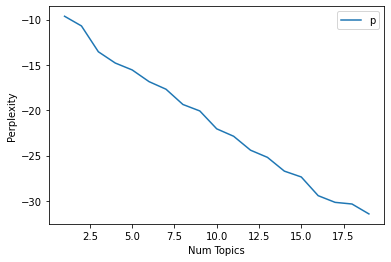

In [15]:
# Test the CoherenceModel and Perplexity
# The smaller the value of Perplexity, the greater the difference between each topic.
# The higher the value of Coherence, the better the consistency of the topic.

from gensim.models import CoherenceModel

# Compute Perplexity: a measure of how good the model is. lower the better.
perplexity = [] 

# Test various number of topics (1-20)
for n_topics in range(1,20,1):
    # Create the LDA model
    lda_model = models.ldamodel.LdaModel(corpus=corpus,
                                 id2word=dictionary,
                                 num_topics=n_topics)
    # Prepare the corpus and compute the perplexity score
    corpus_per = lda_model[corpus]
    perplexitymodel = lda_model.log_perplexity(corpus_per)
    perplexity.append(perplexitymodel)
    
# line chart of perplexity
import matplotlib.pyplot as plt
%matplotlib inline

limit=20; start=1; step=1;
x = range(start, limit, step)
plt.plot(x, perplexity)
plt.xlabel("Num Topics")
plt.ylabel("Perplexity")
plt.legend(("perplexity_values"), loc='best')
plt.show()

In [16]:
# Print the perplexity scores
for m, cv in zip(x, perplexity):
    print("Num Topics =", m, " preplexity score:", round(cv, 4))

Num Topics = 1  preplexity score: -9.6242
Num Topics = 2  preplexity score: -10.6934
Num Topics = 3  preplexity score: -13.544
Num Topics = 4  preplexity score: -14.7881
Num Topics = 5  preplexity score: -15.5481
Num Topics = 6  preplexity score: -16.8424
Num Topics = 7  preplexity score: -17.6757
Num Topics = 8  preplexity score: -19.3596
Num Topics = 9  preplexity score: -20.075
Num Topics = 10  preplexity score: -22.0481
Num Topics = 11  preplexity score: -22.8666
Num Topics = 12  preplexity score: -24.4049
Num Topics = 13  preplexity score: -25.1956
Num Topics = 14  preplexity score: -26.7147
Num Topics = 15  preplexity score: -27.3586
Num Topics = 16  preplexity score: -29.4236
Num Topics = 17  preplexity score: -30.1597
Num Topics = 18  preplexity score: -30.3425
Num Topics = 19  preplexity score: -31.4359


using symmetric alpha at 0.01
using symmetric eta at 0.01
using serial LDA version on this node
running online (single-pass) LDA training, 100 topics, 1 passes over the supplied corpus of 1658 documents, updating model once every 1658 documents, evaluating perplexity every 1658 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
-23.559 per-word bound, 12359300.6 perplexity estimate based on a held-out corpus of 1658 documents with 71091 words
PROGRESS: pass 0, at document #1658/1658
topic #38 (0.010): 0.021*"us" + 0.020*"experi" + 0.017*"time" + 0.017*"guest" + 0.016*"thank" + 0.016*"servic" + 0.015*"regard" + 0.014*"dear" + 0.012*"compliment" + 0.012*"appreci"
topic #30 (0.010): 0.033*"us" + 0.027*"thank" + 0.026*"time" + 0.021*"guest" + 0.018*"experi" + 0.015*"dear" + 0.012*"look" + 0.012*"forward" + 0.012*"welcom" + 0.011*"back"
topic #25 (0.010): 0

accumulated word occurrence stats for 2274 virtual documents
using symmetric alpha at 0.01
using symmetric eta at 0.01
using serial LDA version on this node
running online (single-pass) LDA training, 100 topics, 1 passes over the supplied corpus of 1658 documents, updating model once every 1658 documents, evaluating perplexity every 1658 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
-23.561 per-word bound, 12375622.5 perplexity estimate based on a held-out corpus of 1658 documents with 71091 words
PROGRESS: pass 0, at document #1658/1658
topic #52 (0.010): 0.032*"thank" + 0.023*"review" + 0.023*"time" + 0.015*"recent" + 0.015*"hope" + 0.015*"moon" + 0.015*"wonder" + 0.014*"dear" + 0.013*"share" + 0.013*"feedback"
topic #15 (0.010): 0.024*"thank" + 0.017*"dear" + 0.016*"servic" + 0.016*"regard" + 0.015*"us" + 0.015*"share" + 0.014*"back" + 0.012*"r

7 accumulators retrieved from output queue
accumulated word occurrence stats for 2274 virtual documents
using symmetric alpha at 0.01
using symmetric eta at 0.01
using serial LDA version on this node
running online (single-pass) LDA training, 100 topics, 1 passes over the supplied corpus of 1658 documents, updating model once every 1658 documents, evaluating perplexity every 1658 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
-23.559 per-word bound, 12357276.9 perplexity estimate based on a held-out corpus of 1658 documents with 71091 words
PROGRESS: pass 0, at document #1658/1658
topic #24 (0.010): 0.033*"us" + 0.029*"thank" + 0.022*"dear" + 0.021*"team" + 0.018*"guest" + 0.016*"comment" + 0.015*"welcom" + 0.014*"back" + 0.014*"dorsett" + 0.013*"regard"
topic #81 (0.010): 0.030*"us" + 0.018*"thank" + 0.018*"time" + 0.016*"enjoy" + 0.014*"experi" +

7 accumulators retrieved from output queue
accumulated word occurrence stats for 2274 virtual documents
using symmetric alpha at 0.01
using symmetric eta at 0.01
using serial LDA version on this node
running online (single-pass) LDA training, 100 topics, 1 passes over the supplied corpus of 1658 documents, updating model once every 1658 documents, evaluating perplexity every 1658 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
-23.553 per-word bound, 12308101.0 perplexity estimate based on a held-out corpus of 1658 documents with 71091 words
PROGRESS: pass 0, at document #1658/1658
topic #39 (0.010): 0.021*"guest" + 0.021*"thank" + 0.017*"review" + 0.017*"experi" + 0.015*"dear" + 0.014*"us" + 0.013*"time" + 0.012*"back" + 0.012*"menu" + 0.012*"hope"
topic #82 (0.010): 0.039*"us" + 0.026*"guest" + 0.021*"time" + 0.020*"thank" + 0.014*"share" + 0.014*

7 accumulators retrieved from output queue
accumulated word occurrence stats for 2274 virtual documents
using symmetric alpha at 0.01
using symmetric eta at 0.01
using serial LDA version on this node
running online (single-pass) LDA training, 100 topics, 1 passes over the supplied corpus of 1658 documents, updating model once every 1658 documents, evaluating perplexity every 1658 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
-23.561 per-word bound, 12374983.9 perplexity estimate based on a held-out corpus of 1658 documents with 71091 words
PROGRESS: pass 0, at document #1658/1658
topic #23 (0.010): 0.026*"us" + 0.019*"happi" + 0.015*"realli" + 0.015*"hope" + 0.015*"abl" + 0.014*"provid" + 0.014*"servic" + 0.013*"guest" + 0.012*"orient" + 0.012*"concierg"
topic #34 (0.010): 0.027*"team" + 0.024*"thank" + 0.023*"comment" + 0.018*"us" + 0.015*"hear" 

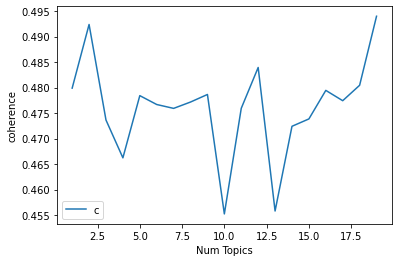

In [17]:
# Code Ref: AIDM7380 L8 - Exercise 10-11-12 - Solution
# build many LDA models with different values of the number of topics (k) and pick the one that gives the highest coherence value. 
# Choosing a ‘k’ that marks the end of a rapid growth of topic coherence usually offers meaningful and interpretable topics.

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        
    return model_list, coherence_values

model_list, coherence_values= compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=tokenDesc, start=1, limit=20, step=1)

# line chart of coherence
limit=20; start=1; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("coherence")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [18]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 1  has Coherence Value of 0.4799
Num Topics = 2  has Coherence Value of 0.4924
Num Topics = 3  has Coherence Value of 0.4736
Num Topics = 4  has Coherence Value of 0.4662
Num Topics = 5  has Coherence Value of 0.4784
Num Topics = 6  has Coherence Value of 0.4767
Num Topics = 7  has Coherence Value of 0.4759
Num Topics = 8  has Coherence Value of 0.4772
Num Topics = 9  has Coherence Value of 0.4787
Num Topics = 10  has Coherence Value of 0.4552
Num Topics = 11  has Coherence Value of 0.4759
Num Topics = 12  has Coherence Value of 0.484
Num Topics = 13  has Coherence Value of 0.4558
Num Topics = 14  has Coherence Value of 0.4724
Num Topics = 15  has Coherence Value of 0.4739
Num Topics = 16  has Coherence Value of 0.4795
Num Topics = 17  has Coherence Value of 0.4774
Num Topics = 18  has Coherence Value of 0.4805
Num Topics = 19  has Coherence Value of 0.494


## Topic Modelling - LDA - Non-Quarantine - customer reviews

In [19]:
tokenDesc = []
for index, text in NonQuan.iterrows():
    tokenDesc.append(tokenize(text["customer review text all"]))
    
#generate a dictionary from token list
dictionary = corpora.Dictionary(tokenDesc)

#generate a corpus containing a Bag of Words for each description
corpus = [dictionary.doc2bow(text) for text in tokenDesc]

#Generate an LDA model
n_topics = 7

lda_model = models.ldamodel.LdaModel(corpus=corpus,
                                     id2word=dictionary,
                                     num_topics=n_topics)

lda_model.show_topics()

adding document #0 to Dictionary(0 unique tokens: [])
built Dictionary(6139 unique tokens: ['100', '24', '6', '800', 'accommod']...) from 1568 documents (total 84687 corpus positions)
Dictionary lifecycle event {'msg': "built Dictionary(6139 unique tokens: ['100', '24', '6', '800', 'accommod']...) from 1568 documents (total 84687 corpus positions)", 'datetime': '2022-04-21T00:31:46.985982', 'gensim': '4.1.2', 'python': '3.8.8 (default, Apr 13 2021, 12:59:45) \n[Clang 10.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'created'}
using symmetric alpha at 0.14285714285714285
using symmetric eta at 0.14285714285714285
using serial LDA version on this node
running online (single-pass) LDA training, 7 topics, 1 passes over the supplied corpus of 1568 documents, updating model once every 1568 documents, evaluating perplexity every 1568 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of

[(0,
  '0.019*"staff" + 0.016*"good" + 0.010*"time" + 0.009*"us" + 0.009*"great" + 0.009*"servic" + 0.009*"staycat" + 0.009*"clean" + 0.008*"view" + 0.008*"nice"'),
 (1,
  '0.012*"good" + 0.010*"servic" + 0.009*"staycat" + 0.008*"staff" + 0.008*"view" + 0.007*"great" + 0.007*"birthday" + 0.006*"us" + 0.006*"check" + 0.006*"thank"'),
 (2,
  '0.012*"staff" + 0.009*"check" + 0.008*"nice" + 0.007*"servic" + 0.007*"good" + 0.006*"time" + 0.006*"thank" + 0.005*"help" + 0.005*"great" + 0.005*"view"'),
 (3,
  '0.020*"staff" + 0.010*"good" + 0.010*"servic" + 0.010*"excel" + 0.009*"nice" + 0.009*"help" + 0.007*"check" + 0.007*"us" + 0.007*"staycat" + 0.006*"time"'),
 (4,
  '0.020*"servic" + 0.014*"staff" + 0.012*"thank" + 0.012*"us" + 0.010*"check" + 0.009*"nice" + 0.009*"time" + 0.008*"good" + 0.007*"great" + 0.007*"staycat"'),
 (5,
  '0.013*"nice" + 0.011*"staff" + 0.010*"great" + 0.010*"servic" + 0.009*"good" + 0.008*"locat" + 0.008*"check" + 0.006*"breakfast" + 0.006*"staycat" + 0.006*"reall

## Topic Modelling - LDA - Non-Quarantine - hotel reply

In [20]:
tokenDesc = []
for index, text in NonQuan.iterrows():
    tokenDesc.append(tokenize(text["hotel reply text"]))
    
#generate a dictionary from token list
dictionary = corpora.Dictionary(tokenDesc)

#generate a corpus containing a Bag of Words for each description
corpus = [dictionary.doc2bow(text) for text in tokenDesc]

#Generate an LDA model
n_topics = 5

lda_model = models.ldamodel.LdaModel(corpus=corpus,
                                     id2word=dictionary,
                                     num_topics=n_topics)

lda_model.show_topics()

adding document #0 to Dictionary(0 unique tokens: [])
built Dictionary(2837 unique tokens: ['appreci', 'back', 'comment', 'dear', 'encourag']...) from 1568 documents (total 47863 corpus positions)
Dictionary lifecycle event {'msg': "built Dictionary(2837 unique tokens: ['appreci', 'back', 'comment', 'dear', 'encourag']...) from 1568 documents (total 47863 corpus positions)", 'datetime': '2022-04-21T00:31:52.635813', 'gensim': '4.1.2', 'python': '3.8.8 (default, Apr 13 2021, 12:59:45) \n[Clang 10.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'created'}
using symmetric alpha at 0.2
using symmetric eta at 0.2
using serial LDA version on this node
running online (single-pass) LDA training, 5 topics, 1 passes over the supplied corpus of 1568 documents, updating model once every 1568 documents, evaluating perplexity every 1568 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passe

[(0,
  '0.029*"dear" + 0.029*"appreci" + 0.028*"forward" + 0.027*"manag" + 0.027*"look" + 0.027*"welcom" + 0.025*"best" + 0.025*"us" + 0.024*"review" + 0.023*"thank"'),
 (1,
  '0.032*"thank" + 0.029*"us" + 0.023*"share" + 0.022*"dear" + 0.021*"manag" + 0.021*"futur" + 0.020*"look" + 0.019*"sincer" + 0.018*"welcom" + 0.017*"experi"'),
 (2,
  '0.030*"thank" + 0.027*"dear" + 0.027*"forward" + 0.027*"look" + 0.024*"us" + 0.024*"welcom" + 0.020*"manag" + 0.020*"review" + 0.019*"back" + 0.018*"servic"'),
 (3,
  '0.029*"us" + 0.028*"dear" + 0.027*"thank" + 0.024*"welcom" + 0.022*"manag" + 0.022*"look" + 0.021*"forward" + 0.017*"appreci" + 0.015*"back" + 0.015*"review"'),
 (4,
  '0.026*"us" + 0.017*"manag" + 0.016*"dear" + 0.015*"thank" + 0.014*"look" + 0.014*"sincer" + 0.014*"experi" + 0.013*"pleas" + 0.013*"feedback" + 0.013*"time"')]